In [121]:
import numpy as np
import pandas

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
d = pandas.read_csv('Breast_cancer_data.csv')

In [3]:
d.shape

(569, 6)

In [4]:
d.head(25)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.990,10.38,122.80,1001.0,0.11840,0
1,20.570,17.77,132.90,1326.0,0.08474,0
2,19.690,21.25,130.00,1203.0,0.10960,0
3,11.420,20.38,77.58,386.1,0.14250,0
4,20.290,14.34,135.10,1297.0,0.10030,0
5,12.450,15.70,82.57,477.1,0.12780,0
6,18.250,19.98,119.60,1040.0,0.09463,0
7,13.710,20.83,90.20,577.9,0.11890,0
8,13.000,21.82,87.50,519.8,0.12730,0
9,12.460,24.04,83.97,475.9,0.11860,0


In [109]:
D = d.to_numpy()

In [110]:
#mean and variance

#filtering the data
#(there must be a better way for doing this I think)
D_yes = np.empty([1, 6])
for i in D:
    if i[5] == 1.0:
        D_yes = np.append(D_yes, i)

        
D_no = np.empty([1, 6])
for i in D:
    if i[5] == 0.0:
        D_no = np.append(D_no, i)        
D_yes = np.reshape(D_yes, (int(D_yes.shape[0]/6), 6))
D_no = np.reshape(D_no, (int(D_no.shape[0]/6), 6))
D_yes = np.delete(D_yes, 0, 0)
D_no = np.delete(D_no, 0, 0)

In [122]:
D_yes_mean = np.mean(D_yes, axis=0)

In [123]:
D_yes_var = np.var(D_yes, axis=0)

In [124]:
D_no_mean = np.mean(D_no, axis=0)

In [125]:
D_no_var = np.var(D_no, axis=0)

In [129]:
#getting ready to plot
X = np.arange(0, 30, 0.01)

NameError: name 'D_np_var' is not defined

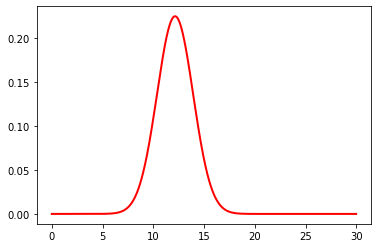

In [132]:
#for mean_radius
plt.plot(X, 1/(np.sqrt(2 * np.pi*D_yes_var[0])) * np.exp( - (X - D_yes_mean[0])**2 / (2 * D_yes_var[0]) ),
        linewidth=2, color='r')
plt.plot(X, 1/(np.sqrt(2 * np.pi*D_no_var[0])) * np.exp( - (X - D_no_mean[0])**2 / (2 * D_np_var[0]) ),
        linewidth=2, color='g')

plt.show()

In [5]:
xp = d.iloc[:,0:5]
yp = d.iloc[:,5]

In [7]:
xp

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [8]:
xp.iloc[0,:]

mean_radius          17.9900
mean_texture         10.3800
mean_perimeter      122.8000
mean_area          1001.0000
mean_smoothness       0.1184
Name: 0, dtype: float64

In [9]:
#let's go to numpy
X = xp.to_numpy()
Y = yp.to_numpy()

In [10]:
#test_train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
Y_pred = GaussianNB().fit(X_train, Y_train).predict(X_test)

In [12]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

In [13]:
Y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

In [14]:
#as we can see the predicted target is somewhat similar to the real target
#but we must speak in the measures language

In [15]:
print("Number of dismatches from %d points is: %d"% (X_test.shape[0], (Y_test != Y_pred).sum()))

Number of dismatches from 114 points is: 8


In [16]:
confusion_matrix(Y_test, Y_pred)

array([[41,  6],
       [ 2, 65]])

In [17]:
f1_score(Y_test, Y_pred, average='binary')

0.9420289855072463

In [18]:
#which means we were a success!

In [19]:
#X_r means X dimention reduced
X_r = PCA(n_components=3).fit_transform(X)

In [20]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, 8.581e+02, 8.455e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, 1.265e+03, 1.178e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02]])

In [21]:
X_r

array([[ 3.47389677e+02,  3.45349361e+00, -1.20747094e+01],
       [ 6.72360684e+02,  6.22362058e+00,  1.09934968e+00],
       [ 5.49459884e+02, -2.91297682e-01, -6.66582035e-01],
       ...,
       [ 2.03898289e+02, -7.80257103e+00,  3.05463767e+00],
       [ 6.12040081e+02, -1.00651286e+01, -3.02360903e-01],
       [-4.75802609e+02,  1.90419376e+00,  1.36947364e+01]])

In [22]:
#test_train
X_r_train, X_r_test, Y_r_train, Y_r_test = train_test_split(X_r, Y, test_size=0.2, random_state=0)

In [23]:
Y_r_pred = GaussianNB().fit(X_r_train, Y_r_train).predict(X_r_test)

In [24]:
print("Number of dismatches from %d points is: %d"% (X_r_test.shape[0], (Y_r_test != Y_r_pred).sum()))

Number of dismatches from 114 points is: 9


In [25]:
confusion_matrix(Y_r_test, Y_r_pred)

array([[41,  6],
       [ 3, 64]])

In [26]:
f1_score(Y_r_test, Y_r_pred, average='binary')

0.9343065693430657

In [33]:
#X_r means X dimention reduced
X_r_2 = PCA(n_components=2).fit_transform(X)

In [34]:
#test_train
X_r_2_train, X_r_2_test, Y_r_2_train, Y_r_2_test = train_test_split(X_r_2, Y, test_size=0.2, random_state=0)

In [35]:
Y_r_2_pred = GaussianNB().fit(X_r_2_train, Y_r_2_train).predict(X_r_2_test)

In [36]:
print("Number of dismatches from %d points is: %d"% (X_r_2_test.shape[0], (Y_r_2_test != Y_r_2_pred).sum()))

Number of dismatches from 114 points is: 11


In [37]:
confusion_matrix(Y_r_2_test, Y_r_2_pred)

array([[40,  7],
       [ 4, 63]])

In [38]:
f1_score(Y_r_2_test, Y_r_2_pred, average='binary')

0.9197080291970803

In [40]:
D

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 0.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 0.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, 8.581e+02, 8.455e-02, 0.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, 1.265e+03, 1.178e-01, 0.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02, 1.000e+00]])